# Snap EDA

Goals:
* EDA on chosen snap dataset
* Look at Gourmet_Foods.txt.gz
* Use 5-core for smaller dataset

EDA Questions:
* How many reviews?
* Which columns are interesting?
    * likely 'reviewTest
* What is the distribution of sizes of reviewTest?

In [1]:
import pandas as pd
import gzip
import json

In [2]:
# Read in grocery and gourmet food data

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')


In [3]:
df = getDF('Grocery_and_Gourmet_Food_5.json.gz')

In [4]:
# Have a look:
df.head(5)
df.head(100)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5.0,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5.0,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5.0,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5.0,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,True,"02 15, 2016",AKG3JBET7O0RZ,9742356831,Ancu,"We love it! Awesome, strong, curry flavor. Bes...",Five Stars,1455494400,NaN,NaN,NaN
96,5.0,True,"01 22, 2016",A30YO8R7OCLGOO,9742356831,Chris C.,Great tasting curry with many possible uses.,Five Stars,1453420800,NaN,NaN,NaN
97,5.0,True,"10 31, 2015",A102D7NPKXXS5F,9742356831,Lynn,"This stuff is HOT. But it has serious flavor,...",Hot but with real flavor,1446249600,NaN,NaN,NaN
98,5.0,True,"09 4, 2015",ACHULEYKFIZRB,9742356831,Ann Marie,a great product,Five Stars,1441324800,NaN,NaN,NaN


In [5]:
# How large is df?
print(f"df shape: {df.shape})

SyntaxError: EOL while scanning string literal (3565132544.py, line 2)

In [6]:
# Look at star ratings:
print(df["overall"].max())
print(df["overall"].min())

5.0
1.0


Review Rating Distribution:


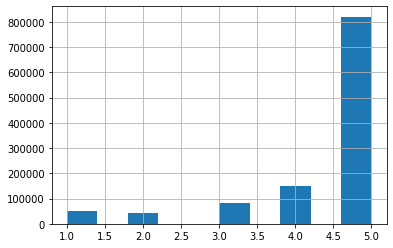

In [7]:
n_bins = 10
print("Review Rating Distribution:")
hist = df["overall"].hist(bins=n_bins)

# Reviews are heavily contrated toward positive, with relatively few negative. Slight spike toward 1*

In [8]:
# Range of reviewTime
print(df["reviewTime"].max())
print(df["reviewTime"].min())

12 9, 2017
01 1, 2007


In [9]:
# Looking at reviewText and summary.
# Distribution in number of words
# 10 most common words
# Total size of corpus

In [10]:
df["reviewText_len"] = df.apply(lambda row: len(str(row.reviewText).split()) , axis=1)
df["reviewText_len"].iloc[0]
# len(df["reviewText"].iloc[0].split())
# df['c'] = df.apply(lambda row: row.a + row.b, axis=1)


3

Review Text Length (n words) Distribution:


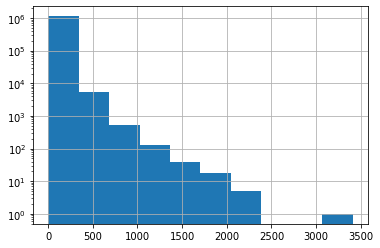

In [11]:
print("Review Text Length (n words) Distribution:")

hist = df["reviewText_len"].hist(bins=n_bins, log=True)

In [13]:
df["summary_len"] = df.apply(lambda row: len(str(row.summary).split()) , axis=1)
df["summary_len"].iloc[0]

2

Review Summary Length (n words) Distribution:


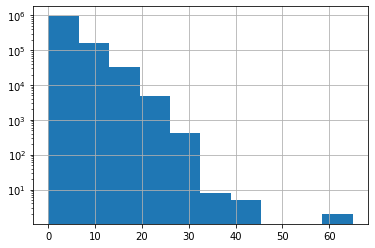

In [14]:
print("Review Summary Length (n words) Distribution:")

hist = df["summary_len"].hist(bins=n_bins, log=True)

In [ ]:
# create a corpus from the summary stats

In [ ]:
# Count number of votes that are NaNs.
# check reviewerName repetitions. 

# Use spacy to remove stop words. 
# explore spacy. 

# Possible to use asin to get other useful metadata. In Dan's case - book titles...
# Distribution of reviews per asin.

# Dan thinks a next great step: 
# * basis of building a model.
# * i.e. try to predict star rating (1-5) based off review text... in class different options for taking in review text and converting it to something we can reason about.
# FOr each review, create something that is a 1-hot encoding of that review. i.e. for all words used in corpus.